In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Admission_Predict-1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [3]:
df.shape

(400, 9)

In [4]:
df.dtypes


Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [5]:
df.Research = df.Research.astype(object)

In [6]:
df = df.drop('Serial No.',axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [7]:
df_target = df['Chance of Admit']

In [8]:
df_feature = df.drop('Chance of Admit',axis=1)

In [9]:
df_num = df_feature.select_dtypes(include=[np.number])

In [10]:
df_cat = df_feature.select_dtypes(include=[np.object_])

In [11]:
df_feature.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
dtype: object

In [12]:
scale = StandardScaler()

In [14]:
scaled = scale.fit_transform(df_num)

In [15]:
df_num = pd.DataFrame(scaled,columns=df_num.columns)
df_num

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029
...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036


In [16]:
X = pd.concat([df_num,df_cat],axis=1)


In [17]:
y = df_target

In [18]:
X = sm.add_constant(X)

In [19]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [21]:
logreg = sm.Logit(y_train, X_train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8


In [22]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                  0.6486
Time:                        15:56:23   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7119      0.330     -2.157      0.031      -1.359      -0.065
GRE Score             0.6095      0.447      1.365      0.172      -0.266       1.485
TOEFL Score           0.

In [23]:
np.exp(logreg.params)

const                 0.490694
GRE Score             1.839477
TOEFL Score           1.220082
University Rating     1.800906
SOP                   1.193371
LOR                   1.668273
CGPA                 13.836155
Research              1.789418
dtype: float64

In [24]:
logreg.params

const               -0.711934
GRE Score            0.609481
TOEFL Score          0.198918
University Rating    0.588290
SOP                  0.176782
LOR                  0.511789
CGPA                 2.627285
Research             0.581890
dtype: float64

In [27]:
y_pred_prob = logreg.predict(X_test.astype(float))
y_pred_prob

332    0.050634
111    0.800663
352    0.016492
205    0.000668
56     0.001146
         ...   
304    0.037234
187    0.997764
166    0.118340
64     0.549633
27     0.000442
Length: 80, dtype: float64

In [31]:
y_pred = [0 if x <0.5 else 1 for x in y_pred_prob]
y_pred[:5]

[0, 1, 0, 0, 0]

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(y_test,y_pred)

In [34]:
cm

array([[33,  9],
       [ 5, 33]])

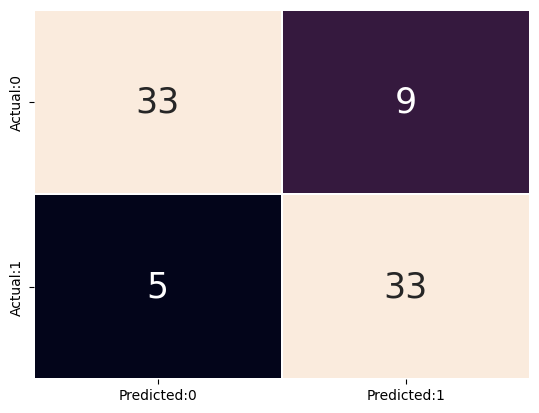

In [55]:
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.show()

In [59]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [62]:
precision = TP/(TP+FP)
precision

0.7857142857142857

In [63]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.868421052631579

In [64]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.7857142857142857

In [65]:
(precision+recall)/2

0.8270676691729324

In [66]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.825

In [67]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.825